#### 서울시 열린데이터 https://data.seoul.go.kr/ 에서 제공하는 ```서울특별시_공공자전거 일별 대여건수_(2018~2019.03).csv``` 분석

In [1]:
import pyspark

myConf=pyspark.SparkConf().set("spark.driver.bindAddress", "127.0.0.1")
#myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [2]:
_bicycle = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true').load('data/서울특별시_공공자전거 일별 대여건수_(2018~2019.03).csv')

In [3]:
_bicycle.show(5)

+----------+------+
|      date| count|
+----------+------+
|2018-01-01|  4950|
|2018-01-02|  7136|
|2018-01-03|  7156|
|2018-01-04|  7102|
|2018-01-05|  7705|
+----------+------+
only showing top 5 rows



### 문제 1-1의 답
#### 년도별 대여건수 합계

In [4]:
bicycle=_bicycle\
    .withColumnRenamed("date", "Date")\
    .withColumnRenamed(" count", "Count")

In [5]:
from pyspark.sql import functions as F
bicycle = bicycle\
    .withColumn('year', F.year('date'))\
    .withColumn('month', F.month('date'))

#bicycle.show(5)

In [6]:
bicycle.groupBy('year').agg({"count":"sum"}).show()

+----+----------+
|year|sum(count)|
+----+----------+
|2018|  10124874|
|2019|   1871935|
+----+----------+



### 문제 1-2의 답
#### 년도별, 월별 대여건수 합계

In [7]:
sumMonthly=bicycle.groupBy('year').pivot('month').agg({"count":"sum"})
sumMonthly.show()

+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
|year|     1|     2|     3|     4|     5|      6|      7|      8|      9|     10|    11|    12|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+
|2018|164367|168741|462661|687885|965609|1207123|1100015|1037505|1447993|1420621|961532|500822|
|2019|495573|471543|904819|  null|  null|   null|   null|   null|   null|   null|  null|  null|
+----+------+------+------+------+------+-------+-------+-------+-------+-------+------+------+



### 문제 1-3의 답
#### 년도별, 월별 대여건수 그래프

In [8]:
plg=sumMonthly.toPandas()
#plg.head()

In [9]:
my=plg.drop('year', 1).transpose()

In [10]:
my.columns=[2018, 2019]

<AxesSubplot:>

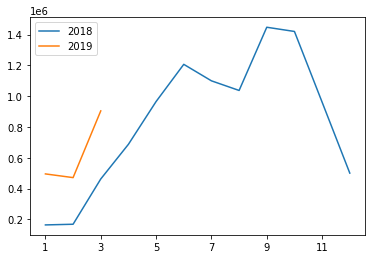

In [11]:
my.plot(kind='line')